In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [9]:
data = pd.read_excel("maliciousornot.xlsx")
data.head(10)

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456
5,1,16.126900,20.336733,106.955673,618.003533,0.165544,0.220207,0.204404,0.104780,0.270336,...,20.038807,30.764167,133.937467,960.619200,0.231994,0.679920,0.693651,0.225518,0.516190,0.161139
6,1,23.639833,25.880760,154.921867,1347.146667,0.122577,141.191333,0.145984,95.854667,0.232383,...,29.637227,35.828920,198.445067,2080.305333,0.186787,0.333678,0.490154,0.250258,0.396761,0.108393
7,1,17.759020,26.981793,116.839067,748.573133,0.154015,0.213082,0.121321,0.077526,0.284455,...,22.098387,36.450680,143.263867,1161.914000,0.214248,0.476942,0.346890,0.201554,0.413989,0.149093
8,1,16.839333,28.264173,113.341667,673.314267,0.164896,0.250258,0.240802,0.121153,304.403333,...,20.064713,39.805593,137.564400,957.639933,0.220595,0.699610,698.184667,266.838667,0.567097,0.138860
9,1,16.139853,31.139813,108.769140,616.449133,0.153627,0.310362,0.294429,0.110660,262.952667,...,19.546580,52.694160,126.489300,921.500133,0.240025,1370.462667,1431.343333,286.268667,0.565543,0.268782


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [11]:
data.columns

Index(['Type', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS',
       'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'SOURCE_A', 'SOURCE_B', 'SOURCE_C', 'SOURCE_D',
       'SOURCE_F', 'SOURCE_E', 'SOURCE_G', 'SOURCE_H', 'SOURCE_I', 'SOURCE_J',
       'SOURCE_K', 'SOURCE_M', 'SOURCE_L', 'SOURCE_N', 'SOURCE_O', 'SOURCE_P',
       'SOURCE_R', 'SOURCE_S'],
      dtype='object')

In [12]:
data.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [13]:
data.corr()["Type"].sort_values()  

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

<AxesSubplot:xlabel='Type', ylabel='count'>

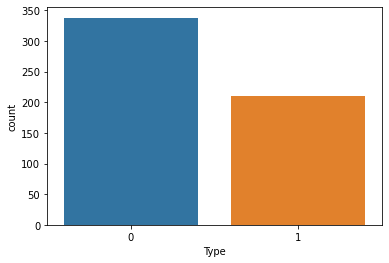

In [15]:
sbn.countplot(x = "Type", data = data)

<AxesSubplot:>

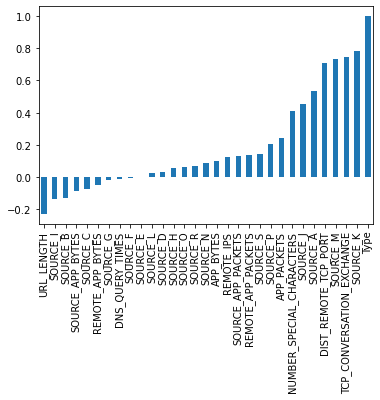

In [16]:
data.corr()["Type"].sort_values().plot(kind = "bar")  ## plot 2 sides

In [26]:
## x and y
y = data["Type"].values
x = data.drop(["Type"], axis = 1).values

In [27]:
## test and train
x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [28]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

In [29]:
x_train.shape

(383, 30)

In [30]:
y_train.shape

(383,)

In [31]:
type(x_train)

numpy.ndarray

In [32]:
type(y_train)

numpy.ndarray

In [33]:
## model
model = Sequential()

model.add(Dense(30, activation = "relu"))   ## you can do according to columns number
model.add(Dense(15, activation = "relu"))
model.add(Dense(15, activation = "relu"))

model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam")

In [35]:
## fit model
model.fit(x = x_train, y = y_train, epochs = 600, validation_data = (x_test, y_true), verbose = 1)

Epoch 1/600
12/12 [==============================] - 1s 15ms/step - loss: 0.6894 - val_loss: 0.6696
Epoch 2/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6708 - val_loss: 0.6541
Epoch 3/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6536 - val_loss: 0.6351
Epoch 4/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6303 - val_loss: 0.6086
Epoch 5/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6012 - val_loss: 0.5729
Epoch 6/600
12/12 [==============================] - 0s 3ms/step - loss: 0.5619 - val_loss: 0.5361
Epoch 7/600
12/12 [==============================] - 0s 3ms/step - loss: 0.5155 - val_loss: 0.4926
Epoch 8/600
12/12 [==============================] - 0s 3ms/step - loss: 0.4664 - val_loss: 0.4469
Epoch 9/600
12/12 [==============================] - 0s 3ms/step - loss: 0.4164 - val_loss: 0.4049
Epoch 10/600
12/12 [==============================] - 0s 3ms/step - loss: 0.3678 - val_loss: 0.3643
Epoch 11

12/12 [==============================] - 0s 3ms/step - loss: 0.0362 - val_loss: 0.2461
Epoch 84/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0351 - val_loss: 0.2460
Epoch 85/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0339 - val_loss: 0.2488
Epoch 86/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0329 - val_loss: 0.2470
Epoch 87/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0319 - val_loss: 0.2542
Epoch 88/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0320 - val_loss: 0.2484
Epoch 89/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0335 - val_loss: 0.2636
Epoch 90/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0315 - val_loss: 0.2534
Epoch 91/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0298 - val_loss: 0.2622
Epoch 92/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0312 - val_loss: 0.2639
Epoch 93/600


12/12 [==============================] - 0s 3ms/step - loss: 0.0152 - val_loss: 0.3340
Epoch 165/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0149 - val_loss: 0.3391
Epoch 166/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0140 - val_loss: 0.3330
Epoch 167/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0142 - val_loss: 0.3372
Epoch 168/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0141 - val_loss: 0.3309
Epoch 169/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0138 - val_loss: 0.3326
Epoch 170/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0142 - val_loss: 0.3357
Epoch 171/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0134 - val_loss: 0.3354
Epoch 172/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0129 - val_loss: 0.3395
Epoch 173/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0143 - val_loss: 0.3384
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.3843
Epoch 246/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.3797
Epoch 247/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.3840
Epoch 248/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.3966
Epoch 249/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.3828
Epoch 250/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0078 - val_loss: 0.3787
Epoch 251/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.3826
Epoch 252/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.3784
Epoch 253/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.3878
Epoch 254/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0075 - val_loss: 0.3776
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.4409
Epoch 327/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.4376
Epoch 328/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.4385
Epoch 329/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.4392
Epoch 330/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.4413
Epoch 331/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.4409
Epoch 332/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.4417
Epoch 333/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0033 - val_loss: 0.4396
Epoch 334/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.4615
Epoch 335/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.4422
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.5151
Epoch 408/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.5199
Epoch 409/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.5203
Epoch 410/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.5176
Epoch 411/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.5367
Epoch 412/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.5158
Epoch 413/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.5482
Epoch 414/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 0.5213
Epoch 415/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0031 - val_loss: 0.5597
Epoch 416/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.5237
Epoc

Epoch 488/600
12/12 [==============================] - 0s 3ms/step - loss: 9.6339e-04 - val_loss: 0.5916
Epoch 489/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.5923
Epoch 490/600
12/12 [==============================] - 0s 3ms/step - loss: 9.1866e-04 - val_loss: 0.5969
Epoch 491/600
12/12 [==============================] - 0s 3ms/step - loss: 8.9079e-04 - val_loss: 0.5937
Epoch 492/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.5924
Epoch 493/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.5947
Epoch 494/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.6052
Epoch 495/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.5834
Epoch 496/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.6073
Epoch 497/600
12/12 [==============================] - 0s 3ms/step - loss: 8.62

12/12 [==============================] - 0s 3ms/step - loss: 5.9537e-04 - val_loss: 0.6901
Epoch 567/600
12/12 [==============================] - 0s 3ms/step - loss: 4.7882e-04 - val_loss: 0.6681
Epoch 568/600
12/12 [==============================] - 0s 3ms/step - loss: 6.5805e-04 - val_loss: 0.6906
Epoch 569/600
12/12 [==============================] - 0s 3ms/step - loss: 5.1933e-04 - val_loss: 0.6979
Epoch 570/600
12/12 [==============================] - 0s 3ms/step - loss: 4.6115e-04 - val_loss: 0.6775
Epoch 571/600
12/12 [==============================] - 0s 3ms/step - loss: 5.6811e-04 - val_loss: 0.6884
Epoch 572/600
12/12 [==============================] - 0s 3ms/step - loss: 4.2113e-04 - val_loss: 0.6718
Epoch 573/600
12/12 [==============================] - 0s 3ms/step - loss: 5.1972e-04 - val_loss: 0.7068
Epoch 574/600
12/12 [==============================] - 0s 3ms/step - loss: 6.9632e-04 - val_loss: 0.6799
Epoch 575/600
12/12 [==============================] - 0s 3ms/step - 

In [37]:
model.history.history

{'loss': [0.6894434690475464,
  0.6707897782325745,
  0.6536359786987305,
  0.6303107142448425,
  0.6011884212493896,
  0.5619252920150757,
  0.515491247177124,
  0.46636509895324707,
  0.41642290353775024,
  0.36776188015937805,
  0.31954264640808105,
  0.2806254029273987,
  0.24755586683750153,
  0.2228832244873047,
  0.2002549171447754,
  0.1837228685617447,
  0.1701168715953827,
  0.15736661851406097,
  0.14948812127113342,
  0.14341802895069122,
  0.1341180056333542,
  0.12884840369224548,
  0.1232556402683258,
  0.12073114514350891,
  0.12107532471418381,
  0.11210548877716064,
  0.11021377891302109,
  0.10508325695991516,
  0.10257364064455032,
  0.09948727488517761,
  0.09783630818128586,
  0.0949845239520073,
  0.09154162555932999,
  0.09319835156202316,
  0.08832062035799026,
  0.08600962907075882,
  0.08388812839984894,
  0.08213150501251221,
  0.07903113216161728,
  0.0800187811255455,
  0.07820657640695572,
  0.07923746854066849,
  0.07469005137681961,
  0.0783316940069198

<AxesSubplot:>

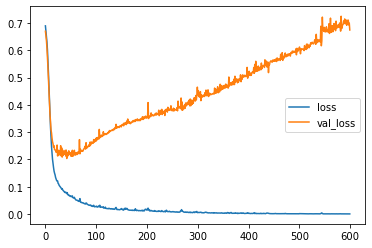

In [39]:
loss_model = pd.DataFrame(model.history.history)
loss_model.plot()

In [43]:
## model2
model2 = Sequential()

model2.add(Dense(30, activation = "relu"))   ## you can do according to columns number
model2.add(Dense(15, activation = "relu"))
model2.add(Dense(15, activation = "relu"))

model2.add(Dense(1, activation = "sigmoid"))

model2.compile(loss = "binary_crossentropy", optimizer = "adam")

In [44]:
early_stopping = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25)

In [45]:
model2.fit(x = x_train, y = y_train, epochs = 600, validation_data = (x_test, y_true), verbose = 1, callbacks = [early_stopping])

Epoch 1/600
12/12 [==============================] - 1s 13ms/step - loss: 0.6809 - val_loss: 0.6765
Epoch 2/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6670 - val_loss: 0.6621
Epoch 3/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6489 - val_loss: 0.6445
Epoch 4/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6262 - val_loss: 0.6217
Epoch 5/600
12/12 [==============================] - 0s 3ms/step - loss: 0.5979 - val_loss: 0.5934
Epoch 6/600
12/12 [==============================] - 0s 3ms/step - loss: 0.5606 - val_loss: 0.5544
Epoch 7/600
12/12 [==============================] - 0s 3ms/step - loss: 0.5165 - val_loss: 0.5090
Epoch 8/600
12/12 [==============================] - 0s 3ms/step - loss: 0.4670 - val_loss: 0.4602
Epoch 9/600
12/12 [==============================] - 0s 3ms/step - loss: 0.4142 - val_loss: 0.4180
Epoch 10/600
12/12 [==============================] - 0s 3ms/step - loss: 0.3651 - val_loss: 0.3687
Epoch 11

12/12 [==============================] - 0s 3ms/step - loss: 0.0359 - val_loss: 0.2097
Epoch 84/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0340 - val_loss: 0.2100
Epoch 85/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0343 - val_loss: 0.2124
Epoch 86/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0329 - val_loss: 0.2129
Epoch 87/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0323 - val_loss: 0.2115
Epoch 88/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0321 - val_loss: 0.2201
Epoch 89/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0315 - val_loss: 0.2156
Epoch 90/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0297 - val_loss: 0.2159
Epoch 91/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0296 - val_loss: 0.2172
Epoch 92/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0294 - val_loss: 0.2167
Epoch 93/600


<AxesSubplot:>

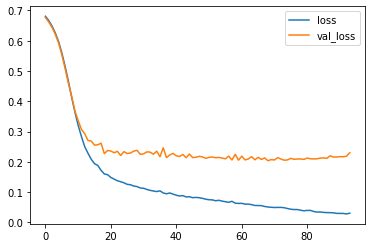

In [47]:
loss_model2 = pd.DataFrame(model2.history.history)
loss_model2.plot()

In [48]:
## model 3
model3 = Sequential()

model3.add(Dense(units=30, activation = "relu"))  ## kolon sayısına gore yapabilirsin.
model3.add(Dropout(0.6))


model3.add(Dense(units=15, activation="relu"))
model3.add(Dropout(0.6))

model3.add(Dense(units=15, activation="relu"))
model3.add(Dropout(0.6))

model3.add(Dense(units=1, activation="sigmoid"))

model3.compile(loss="binary_crossentropy", optimizer = "adam")

In [49]:
model3.fit(x = x_train, y = y_train, epochs = 600, validation_data = (x_test, y_true), verbose = 1, callbacks = [early_stopping])

Epoch 1/600
12/12 [==============================] - 2s 13ms/step - loss: 0.7223 - val_loss: 0.6896
Epoch 2/600
12/12 [==============================] - 0s 3ms/step - loss: 0.7071 - val_loss: 0.6863
Epoch 3/600
12/12 [==============================] - 0s 3ms/step - loss: 0.7206 - val_loss: 0.6836
Epoch 4/600
12/12 [==============================] - 0s 3ms/step - loss: 0.7031 - val_loss: 0.6802
Epoch 5/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6886 - val_loss: 0.6755
Epoch 6/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6840 - val_loss: 0.6695
Epoch 7/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6994 - val_loss: 0.6644
Epoch 8/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6752 - val_loss: 0.6601
Epoch 9/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6773 - val_loss: 0.6524
Epoch 10/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6803 - val_loss: 0.6465
Epoch 11

12/12 [==============================] - 0s 3ms/step - loss: 0.2464 - val_loss: 0.3175
Epoch 84/600
12/12 [==============================] - 0s 3ms/step - loss: 0.2254 - val_loss: 0.2920
Epoch 85/600
12/12 [==============================] - 0s 3ms/step - loss: 0.2523 - val_loss: 0.2833
Epoch 86/600
12/12 [==============================] - 0s 3ms/step - loss: 0.2621 - val_loss: 0.2763
Epoch 87/600
12/12 [==============================] - 0s 3ms/step - loss: 0.2441 - val_loss: 0.2665
Epoch 88/600
12/12 [==============================] - 0s 3ms/step - loss: 0.2241 - val_loss: 0.2768
Epoch 89/600
12/12 [==============================] - 0s 3ms/step - loss: 0.2194 - val_loss: 0.2897
Epoch 90/600
12/12 [==============================] - 0s 3ms/step - loss: 0.2324 - val_loss: 0.2801
Epoch 91/600
12/12 [==============================] - 0s 3ms/step - loss: 0.2273 - val_loss: 0.2696
Epoch 92/600
12/12 [==============================] - 0s 3ms/step - loss: 0.2307 - val_loss: 0.2783
Epoch 93/600


<AxesSubplot:>

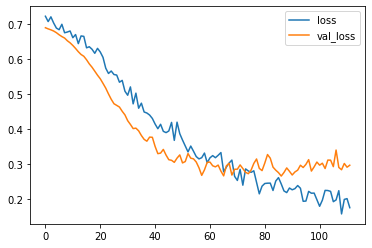

In [50]:
loss_model3 = pd.DataFrame(model3.history.history)
loss_model3.plot()

In [53]:
predictions = (model3.predict(x_test) > 0.5).astype("int32")
predictions

6/6 [==============================] - 0s 1000us/step


array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
    

In [54]:
y_true

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [58]:
classification_report(y_true, predictions)

'              precision    recall  f1-score   support\n\n           0       0.90      0.97      0.94       107\n           1       0.94      0.81      0.87        58\n\n    accuracy                           0.92       165\n   macro avg       0.92      0.89      0.90       165\nweighted avg       0.92      0.92      0.91       165\n'

In [59]:
cnf = confusion_matrix(y_true, predictions)
cnf

array([[104,   3],
       [ 11,  47]], dtype=int64)

In [60]:
acc = accuracy_score(y_true, predictions)
acc * 100

91.51515151515152